In [485]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn .linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report

import warnings
warnings.filterwarnings('ignore')

In [486]:
Wi=pd.read_csv('winequality-red.csv')
Wi.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [487]:
Wi.shape

(1596, 12)

In [488]:
Wi.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [489]:
Wi.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1591,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1592,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1593,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1594,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
1595,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6


In [490]:
Wi.keys()

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [491]:
Wi.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [492]:
Wi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1596 entries, 0 to 1595
Data columns (total 12 columns):
fixed acidity           1596 non-null float64
volatile acidity        1596 non-null float64
citric acid             1596 non-null float64
residual sugar          1596 non-null float64
chlorides               1596 non-null float64
free sulfur dioxide     1596 non-null float64
total sulfur dioxide    1596 non-null float64
density                 1596 non-null float64
pH                      1596 non-null float64
sulphates               1596 non-null float64
alcohol                 1596 non-null float64
quality                 1596 non-null int64
dtypes: float64(11), int64(1)
memory usage: 149.7 KB


In [493]:
Wi.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

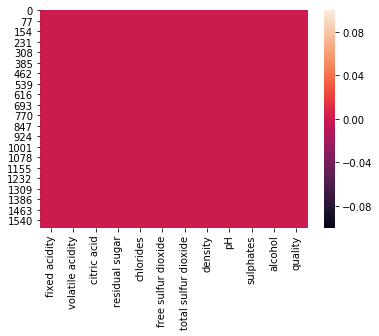

In [494]:
sns.heatmap(Wi.isnull())

In [495]:
Wi.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1596.000000,1596.000000,1596.000000,1596.000000,1596.000000,1596.000000,1596.000000,1596.000000,1596.000000,1596.000000,1596.000000,1596.000000
mean,8.314160,0.527954,0.270276,2.535558,0.087120,15.858396,46.382206,0.996744,3.311917,0.656385,10.421147,5.637218
std,1.732203,0.179176,0.193894,1.405515,0.045251,10.460554,32.839138,0.001888,0.153346,0.163057,1.060371,0.807080
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.860000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996745,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997832,3.400000,0.730000,11.100000,6.000000
max,15.600000,1.580000,0.790000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,1.980000,14.000000,8.000000


In [496]:
Wi.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.255155,0.673008,0.106105,0.093876,-0.157011,-0.116725,0.670895,-0.685062,0.185061,-0.073644,0.127766
volatile acidity,-0.255155,1.000000,-0.554503,0.003957,0.064332,-0.010077,0.077515,0.022390,0.235119,-0.269707,-0.201160,-0.391735
citric acid,0.673008,-0.554503,1.000000,0.139208,0.185893,-0.065745,0.033206,0.363162,-0.537645,0.306241,0.108285,0.233733
residual sugar,0.106105,0.003957,0.139208,1.000000,0.053401,0.186203,0.203252,0.355503,-0.081154,0.002378,0.033380,0.016464
chlorides,0.093876,0.064332,0.185893,0.053401,1.000000,-0.005569,0.043551,0.197957,-0.250010,0.339910,-0.224965,-0.119770
free sulfur dioxide,-0.157011,-0.010077,-0.065745,0.186203,-0.005569,1.000000,0.668426,-0.023672,0.076000,0.043461,-0.070382,-0.048641
total sulfur dioxide,-0.116725,0.077515,0.033206,0.203252,0.043551,0.668426,1.000000,0.070240,-0.060311,0.027173,-0.208148,-0.185404
density,0.670895,0.022390,0.363162,0.355503,0.197957,-0.023672,0.070240,1.000000,-0.340093,0.145326,-0.499736,-0.173251
pH,-0.685062,0.235119,-0.537645,-0.081154,-0.250010,0.076000,-0.060311,-0.340093,1.000000,-0.173073,0.211157,-0.063373
sulphates,0.185061,-0.269707,0.306241,0.002378,0.339910,0.043461,0.027173,0.145326,-0.173073,1.000000,0.102423,0.270777


In [497]:
Wi['quality'].unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

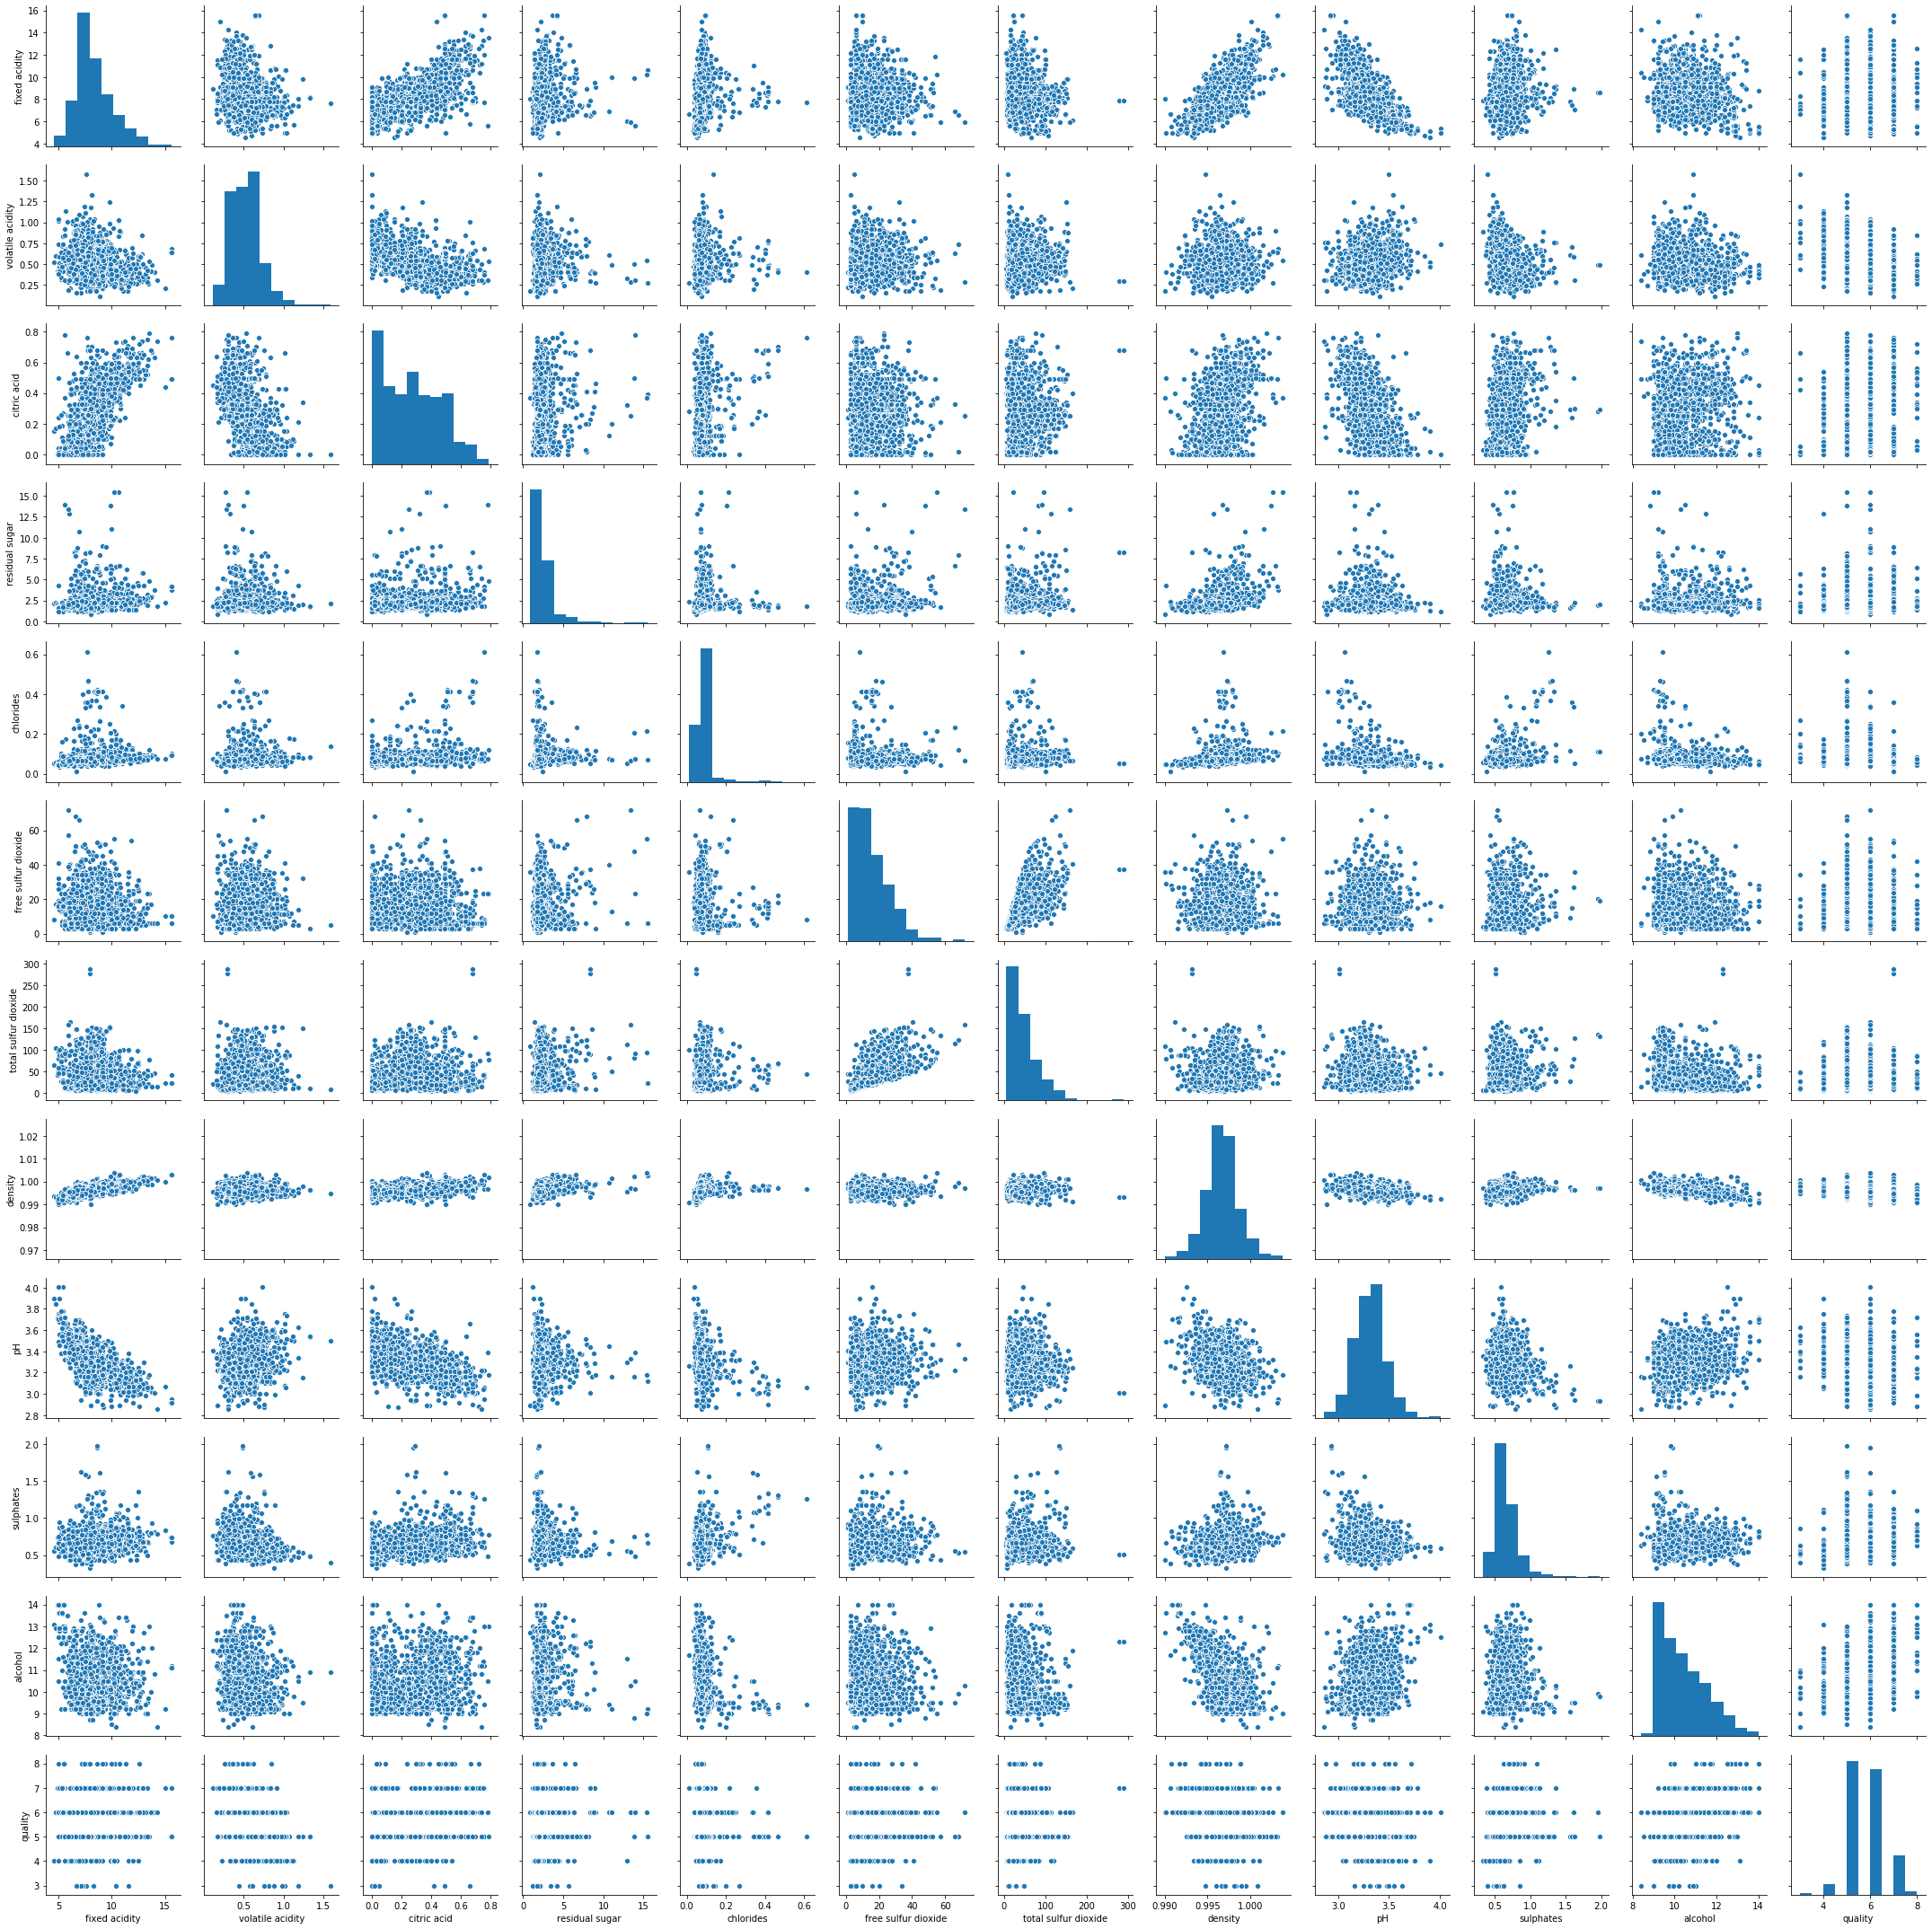

In [498]:
sns.pairplot(Wi)

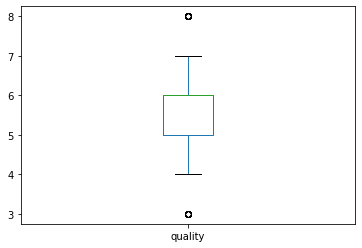

In [499]:
Wi['quality'].plot.box()

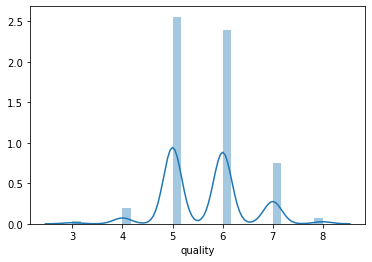

In [500]:
sns.distplot(Wi['quality'])

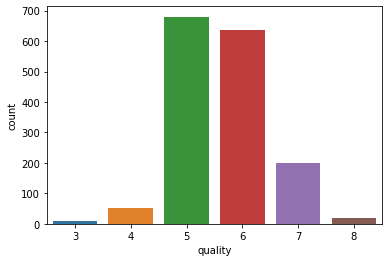

In [501]:
sns.countplot(x='quality', data=Wi)

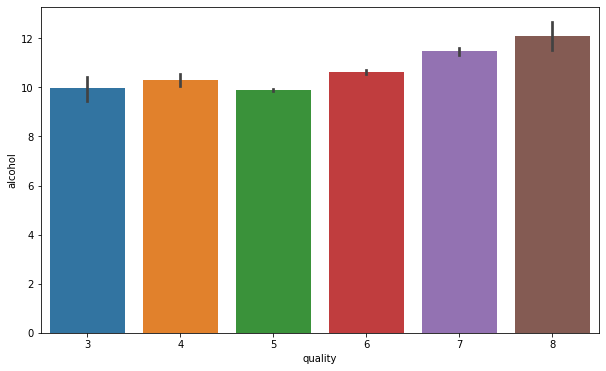

In [502]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'alcohol', data = Wi)

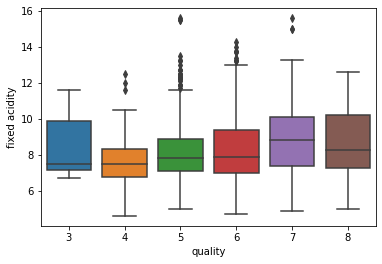

In [503]:
sns.boxplot('quality', 'fixed acidity', data = Wi)

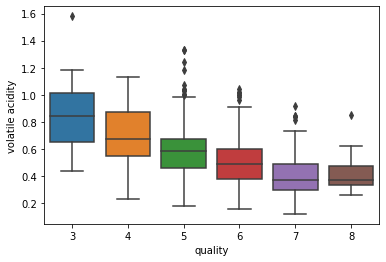

In [504]:
sns.boxplot('quality', 'volatile acidity', data = Wi)

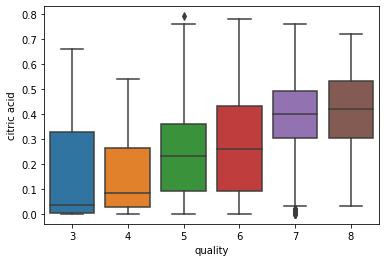

In [505]:
sns.boxplot('quality', 'citric acid', data = Wi)

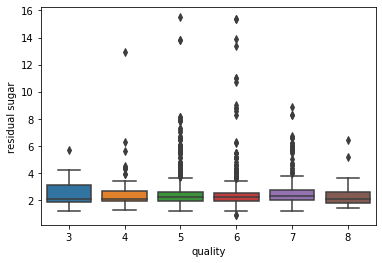

In [506]:
sns.boxplot('quality', 'residual sugar', data = Wi)

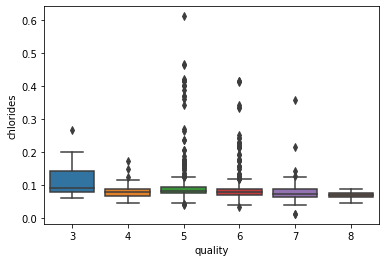

In [507]:
sns.boxplot('quality', 'chlorides', data = Wi)

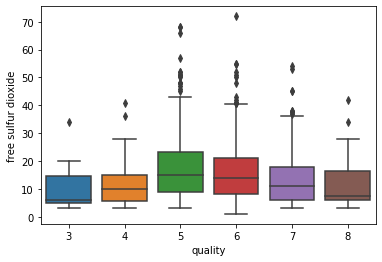

In [508]:
sns.boxplot('quality', 'free sulfur dioxide', data = Wi)

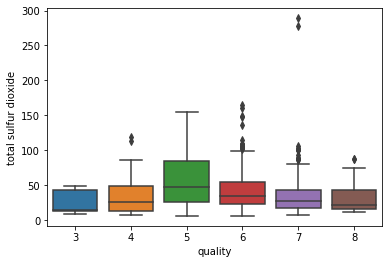

In [509]:
sns.boxplot('quality', 'total sulfur dioxide', data = Wi)

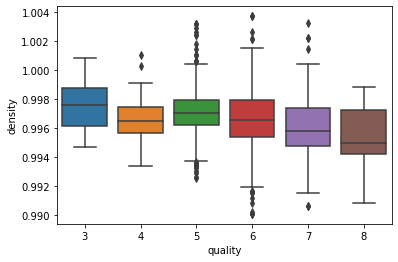

In [510]:
sns.boxplot('quality', 'density', data = Wi)

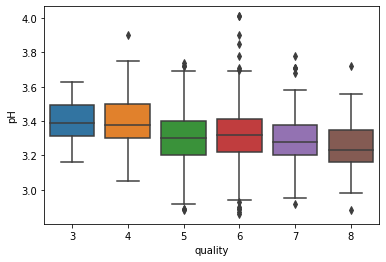

In [511]:
sns.boxplot('quality', 'pH', data = Wi)

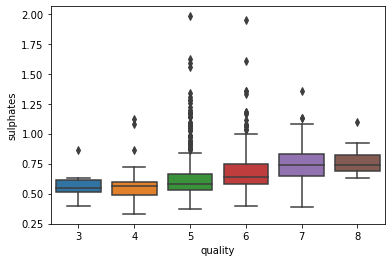

In [512]:
sns.boxplot('quality', 'sulphates', data = Wi)

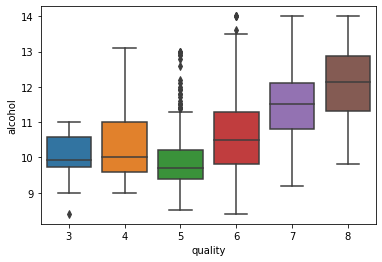

In [513]:
sns.boxplot('quality', 'alcohol', data = Wi)

In [514]:
from sklearn import preprocessing 

In [515]:
le = preprocessing.LabelEncoder() 
  

In [516]:
Wi['quality'] = lq.fit_transform(Wi['quality'])

In [517]:
Wi['quality'].value_counts()

2    680
3    637
4    199
1     52
5     18
0     10
Name: quality, dtype: int64

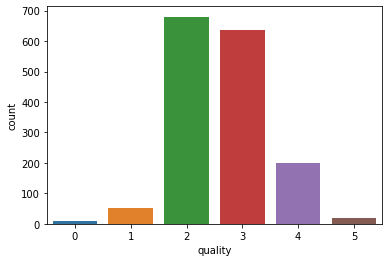

In [518]:
sns.countplot(Wi['quality'])

In [519]:
Wi.skew()

fixed acidity           0.956649
volatile acidity        0.669827
citric acid             0.296219
residual sugar          4.571437
chlorides               5.459801
free sulfur dioxide     1.255061
total sulfur dioxide    1.520835
density                 0.073305
pH                      0.230658
sulphates               2.103171
alcohol                 0.834033
quality                 0.219638
dtype: float64

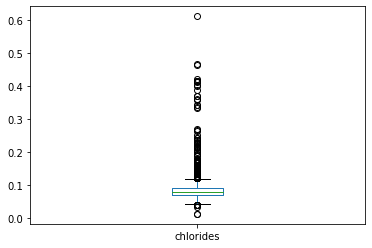

In [520]:
Wi['chlorides'].plot.box()

In [521]:
from scipy.stats import boxcox

In [522]:
Wi.skew()

fixed acidity           0.956649
volatile acidity        0.669827
citric acid             0.296219
residual sugar          4.571437
chlorides               5.459801
free sulfur dioxide     1.255061
total sulfur dioxide    1.520835
density                 0.073305
pH                      0.230658
sulphates               2.103171
alcohol                 0.834033
quality                 0.219638
dtype: float64

In [523]:
Wi['chlorides']=boxcox(Wi['chlorides'],0)

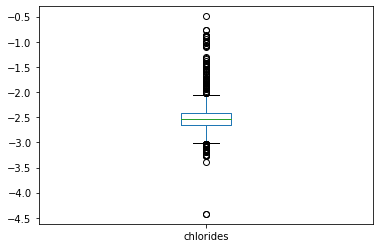

In [524]:
Wi['chlorides'].plot.box()

In [525]:
Wi['residual sugar']=boxcox(Wi['residual sugar'],0)

In [526]:
Wi['free sulfur dioxide']=boxcox(Wi['free sulfur dioxide'],0)

In [527]:
Wi['total sulfur dioxide']=boxcox(Wi['total sulfur dioxide'],0)

In [528]:
Wi['sulphates']=boxcox(Wi['sulphates'],0)

In [529]:
Wi.skew()

fixed acidity           0.956649
volatile acidity        0.669827
citric acid             0.296219
residual sugar          1.810319
chlorides               1.672210
free sulfur dioxide    -0.231196
total sulfur dioxide   -0.077694
density                 0.073305
pH                      0.230658
sulphates               0.820427
alcohol                 0.834033
quality                 0.219638
dtype: float64

In [530]:
from scipy.stats import zscore


In [531]:
z=np.abs(zscore(Wi))
z

array([[0.52790985, 0.96050573, 1.3943694 , ..., 0.60439825, 0.96331098,
        0.7897822 ],
       [0.29691763, 1.9654189 , 1.3943694 , ..., 0.27805785, 0.58596616,
        0.7897822 ],
       [0.29691763, 1.29547678, 1.18800687, ..., 0.07298152, 0.58596616,
        0.7897822 ],
       ...,
       [1.16313844, 0.10023596, 0.72369117, ..., 0.7233874 , 0.54606832,
        0.44964002],
       [1.39413066, 0.65344892, 0.7752818 , ..., 0.47427916, 0.20862133,
        0.7897822 ],
       [1.33638261, 1.21680616, 1.03039037, ..., 0.14237352, 0.54606832,
        0.44964002]])

In [532]:
threshold=3
print(np.where(z>3))

(array([  13,   17,   17,   19,   33,   38,   42,   45,   81,   81,   83,
         86,   91,   94,  105,  105,  119,  125,  126,  141,  143,  146,
        161,  162,  167,  167,  168,  179,  197,  224,  224,  238,  241,
        242,  256,  256,  272,  279,  289,  322,  323,  337,  345,  372,
        379,  389,  394,  398,  440,  440,  449,  457,  465,  478,  478,
        492,  515,  528,  533,  542,  552,  552,  553,  553,  555,  555,
        564,  565,  566,  586,  593,  606,  612,  637,  647,  663,  669,
        687,  687,  689,  692,  720,  721,  727,  751,  770,  773,  774,
        818,  829,  833,  833,  834,  834,  886,  896,  908,  914,  920,
       1014, 1015, 1040, 1048, 1048, 1068, 1071, 1076, 1078, 1095, 1108,
       1111, 1162, 1183, 1232, 1241, 1257, 1266, 1266, 1267, 1267, 1296,
       1296, 1297, 1309, 1313, 1316, 1316, 1318, 1367, 1369, 1371, 1371,
       1431, 1431, 1432, 1432, 1466, 1471, 1471, 1473, 1473, 1475, 1502,
       1555, 1567, 1571, 1586], dtype=int64), arra

In [533]:
z[55][1]

0.5138776465388897

In [534]:
Wi_new=Wi[(z<3).all(axis=1)]

In [535]:
Wi.shape

(1596, 12)

In [536]:
Wi_new.shape

(1473, 12)

In [537]:
Wi_new

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,0.641854,-2.577022,2.397895,3.526361,0.99780,3.51,-0.579818,9.4,2
1,7.8,0.880,0.00,0.955511,-2.322788,3.218876,4.204693,0.99680,3.20,-0.385662,9.8,2
2,7.8,0.760,0.04,0.832909,-2.385967,2.708050,3.988984,0.99700,3.26,-0.430783,9.8,2
3,11.2,0.280,0.56,0.641854,-2.590267,2.833213,4.094345,0.99800,3.16,-0.544727,9.8,3
4,7.4,0.700,0.00,0.641854,-2.577022,2.397895,3.526361,0.99780,3.51,-0.579818,9.4,2
5,7.4,0.660,0.00,0.587787,-2.590267,2.564949,3.688879,0.99780,3.51,-0.579818,9.4,2
6,7.9,0.600,0.06,0.470004,-2.673649,2.708050,4.077537,0.99640,3.30,-0.776529,9.4,2
7,7.3,0.650,0.00,0.182322,-2.733368,2.708050,3.044522,0.99460,3.39,-0.755023,10.0,4
8,7.8,0.580,0.02,0.693147,-2.617296,2.197225,2.890372,0.99680,3.36,-0.562119,9.5,4
9,7.5,0.500,0.36,1.808289,-2.645075,2.833213,4.624973,0.99780,3.35,-0.223144,10.5,2


In [538]:
x=Wi_new.drop('quality',axis=1)
x.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,0.641854,-2.577022,2.397895,3.526361,0.9978,3.51,-0.579818,9.4
1,7.8,0.88,0.00,0.955511,-2.322788,3.218876,4.204693,0.9968,3.20,-0.385662,9.8
2,7.8,0.76,0.04,0.832909,-2.385967,2.708050,3.988984,0.9970,3.26,-0.430783,9.8
3,11.2,0.28,0.56,0.641854,-2.590267,2.833213,4.094345,0.9980,3.16,-0.544727,9.8
4,7.4,0.70,0.00,0.641854,-2.577022,2.397895,3.526361,0.9978,3.51,-0.579818,9.4


In [539]:
y=Wi_new['quality']
y.head()

0    2
1    2
2    2
3    3
4    2
Name: quality, dtype: int64

In [540]:
x.shape

(1473, 11)

In [541]:
y.shape

(1473,)

In [542]:
y=y.values.reshape(-1,1)

In [543]:
y.shape

(1473, 1)

In [544]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=25,random_state=42)

In [545]:
x_train.shape

(1448, 11)

In [546]:
y_train.shape

(1448, 1)

In [547]:
x_test.shape

(25, 11)

In [548]:
y_test.shape

(25, 1)

In [549]:
lm=LinearRegression()

In [550]:
lm.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [551]:
lm.coef_

array([[  0.03818557,  -0.82578097,  -0.25969588,   0.05302456,
         -0.15215777,   0.11447257,  -0.18115146, -25.29983077,
         -0.48362018,   0.93468363,   0.27576037]])

In [552]:
lm.intercept_

array([27.1437389])

In [553]:
lm.score(x_train,y_train)

0.38454049061622675

In [554]:
pred=lm.predict(x_test)
print('predicate result:',pred)
print('actual price',y_test)

predicate result: [[3.61360702]
 [2.1128475 ]
 [2.03045774]
 [2.71516234]
 [2.51480292]
 [3.05359313]
 [2.42767587]
 [2.86020852]
 [2.61740751]
 [2.76824634]
 [2.20791002]
 [2.36830912]
 [2.25647398]
 [2.93026429]
 [2.7428927 ]
 [2.91884575]
 [2.01615158]
 [2.36801705]
 [1.90352311]
 [2.62088437]
 [2.87482123]
 [2.77972961]
 [2.68891149]
 [2.27874306]
 [2.7055757 ]]
actual price [[4]
 [3]
 [2]
 [2]
 [3]
 [3]
 [2]
 [2]
 [3]
 [2]
 [2]
 [2]
 [2]
 [3]
 [2]
 [2]
 [2]
 [2]
 [2]
 [1]
 [3]
 [2]
 [3]
 [3]
 [3]]


In [555]:
lg=LogisticRegression()

In [556]:
lg.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [557]:
pred=lg.predict(x_test)

In [558]:
print(pred)

[3 2 2 2 3 3 2 2 3 2 2 2 2 3 3 4 2 2 2 2 3 3 3 2 3]


In [559]:
print('accuracy score',accuracy_score(pred,y_test))

accuracy score 0.72


In [560]:
print(confusion_matrix(y_test,pred))

[[ 0  1  0  0]
 [ 0 11  2  1]
 [ 0  2  7  0]
 [ 0  0  1  0]]


In [561]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         1
           2       0.79      0.79      0.79        14
           3       0.70      0.78      0.74         9
           4       0.00      0.00      0.00         1

    accuracy                           0.72        25
   macro avg       0.37      0.39      0.38        25
weighted avg       0.69      0.72      0.71        25



In [562]:
from sklearn.svm import SVC


In [563]:
print('error')
print("mean absolute error:",mean_absolute_error(y_test,pred))
print("mean square error",mean_squared_error(y_test,pred))
print('rooot mean square error',np.sqrt(mean_squared_error(y_test,pred)))

error
mean absolute error: 0.32
mean square error 0.4
rooot mean square error 0.6324555320336759


In [564]:
from sklearn.metrics import r2_score
print(r2_score(y_test,pred))

0.0


In [565]:
from sklearn.ensemble import AdaBoostClassifier



In [566]:
from sklearn import metrics

In [567]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

In [568]:
abc = AdaBoostClassifier(n_estimators=50,learning_rate=1)

model = abc.fit(x_train, y_train)


y_pred = model.predict(x_test)

In [569]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.34841628959276016
